
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Mariana! Tu trabajo es muy bueno. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Sin embargo, te he dejado comentarios sobre errores que son claves que revises para futuros sprints.

No los dejes pasa

</div>

Has completado todos los items necesarios para aprobar la entrega.

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Un Jupyter Notebook está diseñado para facilitar el desarrollo y la comunicación de ideas en ciencia de datos, aprendizaje automático y programación en general. Para aprovecharlo adecuadamente, es fundamental estructurar el contenido de forma clara y modular. Es una mala práctica colocar todo el código en una única celda, ya que esto dificulta la legibilidad, el mantenimiento y la depuración del trabajo.

En su lugar, se recomienda dividir el código en celdas pequeñas y temáticamente coherentes. Por ejemplo, una celda puede estar dedicada a importar librerías, otra a cargar y explorar los datos, otra a definir funciones, y así sucesivamente. Esto permite ejecutar partes del código de forma independiente, detectar errores más fácilmente, y mantener un flujo de trabajo ordenado. Además, debe aprovecharse la posibilidad de incluir celdas de texto (Markdown) para documentar el proceso: explicar qué se hace, por qué se toma una determinada decisión o qué significa un resultado. Esta combinación de código y explicación convierte al notebook en una herramienta potente no solo para programar, sino también para comunicar y revisar el trabajo de forma profesional.

También te recomiendo usar celdas de tipo **Markdown** para organizar mejor tu trabajo. Puedes agregar **títulos**, separar secciones y explicar tu código de manera clara. Esto no solo mejora la legibilidad, sino que también te ayuda a entender y explicar mejor tu proceso. 📚✍️

</div>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

# 1. Cargar datos
df = pd.read_csv('/datasets/Churn.csv')

# 2. Eliminar columnas irrelevantes
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# 3. Separar variables
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4. Imputar valores nulos (si hay)
X.fillna(X.mean(numeric_only=True), inplace=True)
for col in ['Geography', 'Gender']:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].mode()[0], inplace=True)

# 5. Columnas categóricas
categorical_features = ['Geography', 'Gender']

# 6. Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_features])
    ]
)

# 7. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 8. Pipeline con modelo base
model_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 9. Entrenar
model_base.fit(X_train, y_train)

# 10. Evaluación
y_pred = model_base.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_base.predict_proba(X_test)[:, 1])

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


F1 Score: 0.5759
AUC-ROC: 0.8523


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo utilizando One-Hot Encoding (OHE)! Esta técnica es ideal para convertir variables categóricas en un formato numérico, permitiendo que los modelos de aprendizaje automático puedan procesarlas. OHE asegura que los datos categóricos no introduzcan relaciones ficticias entre variables.

Además, usaste correctamente `drop_first=True`, lo que evita la multicolinealidad al eliminar una categoría redundante. Esto ayuda a reducir la dimensionalidad de los datos sin perder información.

---

Buen ojo! Eliminaste las columnas innecesarias, lo que ayuda a reducir el ruido en los datos. Estas columnas, como RowNumber, CustomerId y Surname, no aportan información útil para el modelo, por lo que eliminarlas es una excelente decisión.

---



<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Ten cuidado al imputar valores para datos nulos, ya que esto puede alterar la distribución original de los datos. Es importante distinguir entre columnas categóricas y numéricas. Por ejemplo, en columnas categóricas, imputar con "unknown" puede ser razonable, pero en columnas numéricas, asignar un valor arbitrario o una media o mediana puede generar resultados inconsistentes.

Piensa en una columna de edades: ¿tendría sentido imputar los valores nulos con 11? Probablemente no, ya que implicaría que todas las personas con datos faltantes tienen 11 años, lo cual distorsiona la realidad de los datos.

En estos casos, analiza cuidadosamente la columna y evalúa la mejor estrategia para manejar los valores nulos, considerando la naturaleza de los datos y el contexto del problema.

</div>

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Parece que no consideraste el análisis del balance de clases (aunque lo asumes), un aspecto crucial para evaluar si alguna clase está sobrerrepresentada o subrepresentada. Este desequilibrio puede impactar negativamente las predicciones del modelo, por lo que es fundamental revisar cuidadosamente la distribución de las clases.

Además, es importante determinar la magnitud de este desbalance para decidir con precisión qué técnicas aplicar, como _oversampling_ o _downsampling_, y con qué peso emplearlas.
</div>

Usar class_weight='balanced' no mejoró el F1, lo que indica que este enfoque no fue suficiente para mejorar la detección de la clase minoritaria.

<div class="alert alert-block alert-warning"> 
<b> Comentario del Revisor - #1</b> <a class="tocSkip"></a>

Cuidado! No estás haciendo un uso del todo correcto de la herramienta.

En un Jupyter Notebook, el kernel actúa como una "memoria compartida" entre todas las celdas. Esto significa que las variables, funciones, y librerías importadas en una celda permanecen disponibles para usarse en otras celdas mientras el kernel esté activo. Por ello:

1. **No es necesario (ni correcto) importar las mismas librerías en cada celda.** Una vez que importas una librería en una celda, estará disponible para todo el notebook. Importarlas varias veces no tiene sentido y puede hacer que tu código sea más largo y confuso.
    
2. **Evita repetir código innecesariamente.** Si un fragmento de código (por ejemplo, una función) será utilizado en varias partes del notebook, puedes definirlo en una celda y luego simplemente invocarlo cuando lo necesites. Esto hace que tu trabajo sea más limpio, organizado y fácil de entender.
    
3. **Mantén el orden de ejecución.** Es importante ejecutar las celdas en el orden lógico correcto, ya que si ejecutas una celda que depende de otra sin haberla ejecutado previamente, aparecerán errores.

4. **Evita cargar repetidamente los datos desde un archivo.** Si usas `pd.read_csv` (o funciones similares) en varias celdas para leer el mismo archivo, estarás perdiendo cualquier cambio que hayas hecho a los datos en el notebook. Por ejemplo, si limpias los datos, agregas columnas o realizas cálculos intermedios, todo ese trabajo se descartará porque estás cargando el archivo desde cero cada vez. En su lugar, carga los datos una vez y almacénalos en una variable para trabajar con ellos en todo el notebook.

5. **No es correcto repetir procesos.** Si tomas un dataframe y borras duplicados, no es correcto volver a hacerlo luego. Además de que agrega una carga computacional innecesaria, también hace que la lectura de tu proyecto sea confusa y redundante.

Recuerda, tu notebook debería ser como una narración lógica de tu análisis. Cada celda debería añadir algo nuevo, no repetir cosas que ya has hecho.

Te sugiero que tengas una sesión de ayuda para poder aclarar tus dudas al respecto.

</div>

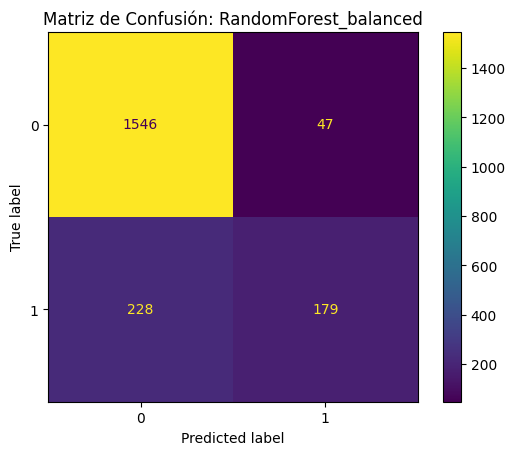

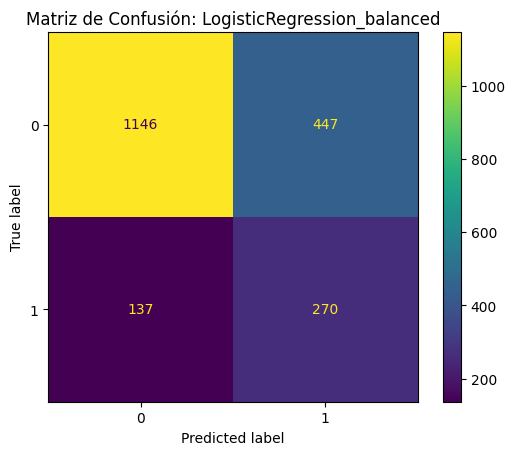

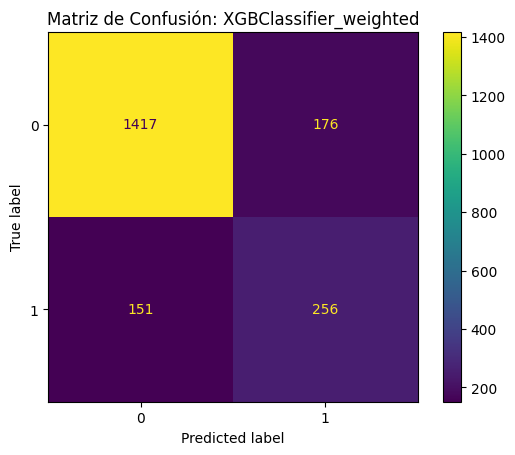

                         Model  F1 Score   ROC AUC
2       XGBClassifier_weighted  0.610250  0.842214
0        RandomForest_balanced  0.565561  0.859760
1  LogisticRegression_balanced  0.480427  0.760667


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Cargar datos (ajusta esta ruta)
df = pd.read_csv('/datasets/Churn.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# 2. Separar variables
X = df.drop('Exited', axis=1)
y = df['Exited']

# 3. Imputar valores nulos
X.fillna(X.mean(numeric_only=True), inplace=True)
for col in ['Geography', 'Gender']:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].mode()[0], inplace=True)

# 4. Columnas categóricas y numéricas
categorical_features = ['Geography', 'Gender']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 5. Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# 6. División de datos
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 7. Modelos
models = {
    'RandomForest_balanced': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'LogisticRegression_balanced': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ]),
    'XGBClassifier_weighted': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1],
                                     use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

# 8. Evaluación
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    results.append({'Model': name, 'F1 Score': f1, 'ROC AUC': roc_auc})

# 9. Matriz de confusión
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusión: {name}")
    plt.show()


# 10. Mostrar resultados ordenados por F1
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

También podrías probar otras técnicas como el balanceo de datos (upsampling o downsampling), que son esenciales para mejorar el rendimiento del modelo en escenarios de clases desbalanceadas.

</div>

 XGBClassifier (con scale_pos_weight)
F1 Score más alto (0.6103): excelente para un problema desbalanceado como churn. Significa que logra un buen balance entre precisión y recall, detectando correctamente clientes que abandonan.

ROC AUC alto (0.8422): muy buena capacidad de discriminación global entre clases.

Conclusión: Este es el mejor modelo general, especialmente si nos interesa capturar casos de abandono sin inundar de falsos positivos.

RandomForest (con class_weight='balanced')
F1 Score decente (0.5656), pero menor que XGBoost: esto indica que captura bastantes abandonos, pero tal vez con más errores que XGB.

ROC AUC más alto de todos (0.8598): excelente capacidad para distinguir entre abandonos y no abandonos. Es posible que esté más conservador en clasificar como abandono, lo que sube AUC pero baja F1.

Conclusión: Buena alternativa si nos importa más la discriminación general y podríamos permitir sacrificar algo de recall.

Logistic Regression (con class_weight='balanced')
F1 Score bajo (0.4804): no está capturando bien los abandonos.

ROC AUC bajo (0.7607): menor capacidad de clasificación general.

Conclusión: Modelo débil en este caso. Solo útil si necesitamos interpretabilidad o rapidez, pero no para producción con estos resultados.

El mejor modelo es: XGBClassifier con scale_pos_weight ya que logra el mayor F1 Score
(0.6103), lo cual sugiere que detecta abandonos con mayor precisión y cobertura que 
los demás.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Fantástico! Documentaste los resultados del estudio del balance de clases. Esto es importante para demostrar cómo has manejado este desafío y cómo impacta en el rendimiento del modelo.

Además, has alcanzado una métrica F1 superior al 0.59. Esta métrica es muy útil en situaciones con clases desbalanceadas, ya que considera tanto la precisión como la exhaustividad (recall) del modelo.

También estudiaste la métrica AUC-ROC, que es una de las mejores métricas para evaluar modelos de clasificación binaria. Un buen AUC-ROC indica que el modelo es capaz de distinguir correctamente entre las clases.
    
</div>